<a href="https://colab.research.google.com/github/SoumeshNayak/DeepLearning-Image-Classification/blob/main/Image_Classification_using_VGG16_(Transfer_Learning)_and_ImageDataGeneratoer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 38.0MB/s]
100% 1.06G/1.06G [00:27<00:00, 42.0MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
# we will make the model of vgg16 whrer we will give wt what it get after trainging in imagenet
# We have to remove fc layer or dense layer and freez conv_later by using include_top=False
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# Make our own dense layer
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#make freez of conv_layer
conv_base.trainable=False


In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize the data
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)  

In [ ]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
his=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 63s 84ms/step - loss: 0.2672 - accuracy: 0.8881 - val_loss: 0.2073 - val_accuracy: 0.9120
Epoch 2/10
625/625 [==============================] - 52s 84ms/step - loss: 0.1883 - accuracy: 0.9231 - val_loss: 0.2065 - val_accuracy: 0.9160
Epoch 3/10
625/625 [==============================] - 52s 84ms/step - loss: 0.1595 - accuracy: 0.9348 - val_loss: 0.2116 - val_accuracy: 0.9152
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1330 - accuracy: 0.9470 - val_loss: 0.2397 - val_accuracy: 0.9122
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1163 - accuracy: 0.9542 - val_loss: 0.2306 - val_accuracy: 0.9162
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0808 - accuracy: 0.9684 - val_loss: 0.2461 - val_accuracy: 0.9138
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0645 - accuracy: 0.9744 - val_loss: 0.2736 - val_accuracy

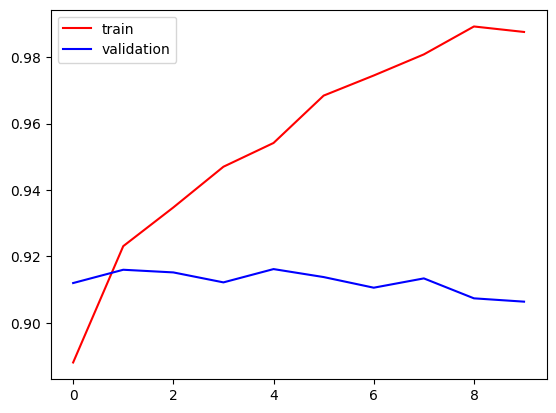

In [ ]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'],color='red',label='train')
plt.plot(his.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#here we see over fitting so we have to user Data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#THIS IS HOW WE USE IMAGEDATAGENERATOR

# datagen=ImageDataGenerator(
#     rotation_range=30,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     # vertical_flip=True,
#     width_shift_range=0.2,
#     height_shift_range=0.2
# )
# input_batch=img.reshape(1,200,200,3)
# datagen.flow(input_batch,batch_size=1)

In [ ]:
batch_size=32
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    "/content/train",
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator=test_datagen.flow_from_directory(
    "/content/test",
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
his=model.fit(train_generator,epochs=10,validation_data=validation_generator)


Epoch 1/10
625/625 [==============================] - 192s 289ms/step - loss: 0.3075 - accuracy: 0.8680 - val_loss: 0.2084 - val_accuracy: 0.9088
Epoch 2/10
625/625 [==============================] - 184s 294ms/step - loss: 0.2399 - accuracy: 0.8988 - val_loss: 0.2029 - val_accuracy: 0.9128
Epoch 3/10
625/625 [==============================] - 181s 289ms/step - loss: 0.2277 - accuracy: 0.9039 - val_loss: 0.2286 - val_accuracy: 0.9040
Epoch 4/10
625/625 [==============================] - 177s 284ms/step - loss: 0.2096 - accuracy: 0.9107 - val_loss: 0.1877 - val_accuracy: 0.9194
Epoch 5/10
625/625 [==============================] - 177s 283ms/step - loss: 0.1989 - accuracy: 0.9158 - val_loss: 0.1865 - val_accuracy: 0.9212
Epoch 6/10
625/625 [==============================] - 177s 283ms/step - loss: 0.1936 - accuracy: 0.9187 - val_loss: 0.1901 - val_accuracy: 0.9174
Epoch 7/10
625/625 [==============================] - 178s 284ms/step - loss: 0.1826 - accuracy: 0.9238 - val_loss: 0.1918 -

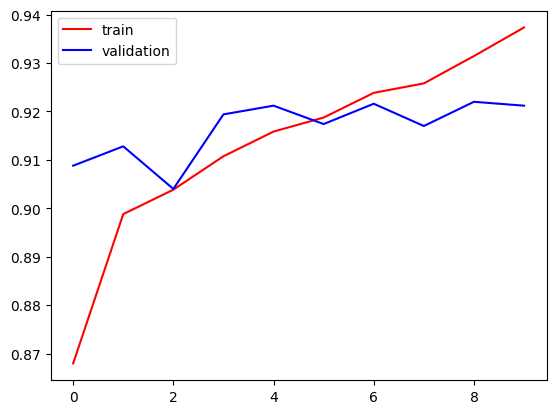

In [ ]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'],color='red',label='train')
plt.plot(his.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()